In [12]:
import kaggle
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import joblib


kaggle.api.authenticate()
data_path = "./models/"
if not os.path.exists(data_path):
    os.makedirs(data_path)
    print(f"Directory created: {data_path}")

slug = "svm-linear-pubmed"
file_names = ["svm.pkl", "vectorizer.pkl"]
kaggle.api.model_instance_version_download_cli(f"marcelhiltner/{slug}/scikitlearn/{slug}/1", data_path, untar=True)
best_svm = joblib.load(f"{data_path}{file_names[0]}")
print("svm loaded.")
vectorizer = joblib.load(f"{data_path}{file_names[1]}")
print("vectorizer loaded.")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36.4M/36.4M [00:02<00:00, 16.7MB/s]



svm loaded.
vectorizer loaded.


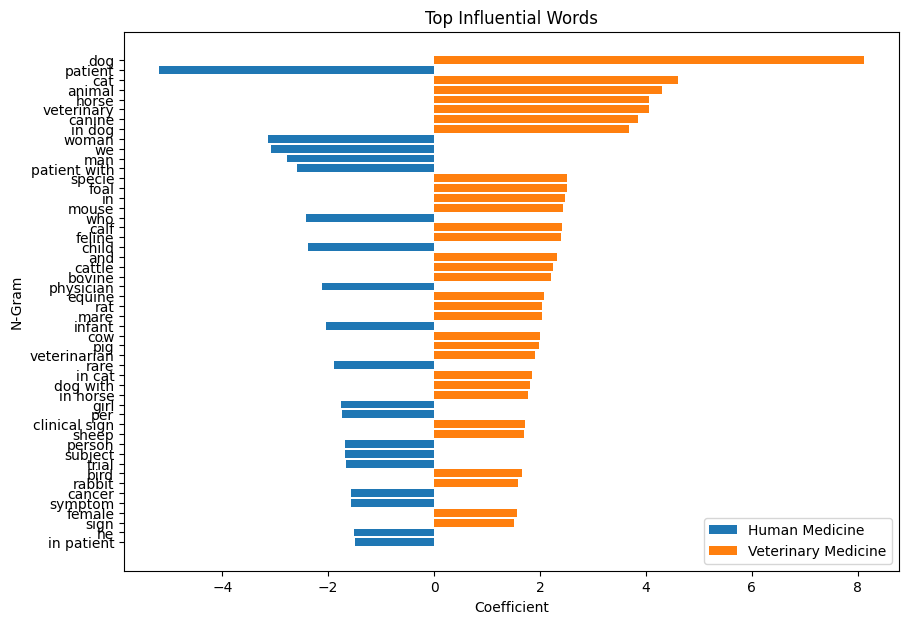

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve feature names from TF-IDFVectorizer
feature_names = vectorizer.get_feature_names_out()
# Retrieve coefficients from LinearSVC
coefficients = best_svm.coef_[0]
# Pair feature names with coefficients
feature_coefficients = zip(feature_names, coefficients)

# Sort features by coefficients (absolute value)
sorted_features = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Select top N influential words
top_n = 50  # Adjust the number of top words as needed
top_features = sorted_features[:top_n]

# Extract words and coefficients for visualization
words = [word for word, _ in top_features]
coeffs = [coeff for _, coeff in top_features]
# Determine colors based on coefficients
colors = ['tab:orange' if coeff > 0 else 'tab:blue' for coeff in coeffs]

# Visualize
plt.figure(figsize=(10,7))
plt.barh(words, coeffs, color=colors)
plt.xlabel('Coefficient')
plt.ylabel('N-Gram')
plt.gca().invert_yaxis()  # Invert y-axis to display top words at the top

# Add legend for colors
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
orange_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:orange", edgecolor='none')
plt.legend([blue_patch, orange_patch], ['Human Medicine', 'Veterinary Medicine'], loc='lower right')
plt.savefig(f"Top_Influential_Words_SVM.pdf", format="pdf", bbox_inches="tight")
plt.title('Top Influential Words')
plt.show()
plt.close()